# High Fidelity vs Low Fidelity simulations

## General settings

We begin by importing the necessary libraries and adjust settings for plotting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from IPython.display import clear_output

In [2]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

## Import simulation files

Next, we import and load the high fidelity and low fidelity simulation files of the mechanical ventilation signal for:
- Times
- Pressures
- Fluxes
- Volumes 

Getting files from personal public repository

In [7]:
!wget https://raw.githubusercontent.com/josebarahonay/prueba/master/hf_bir2019fluxes.npy
!wget https://raw.githubusercontent.com/josebarahonay/prueba/master/hf_bir2019pressures.npy
!wget https://raw.githubusercontent.com/josebarahonay/prueba/master/hf_bir2019times.npy
!wget https://raw.githubusercontent.com/josebarahonay/prueba/master/hf_bir2019volumes.npy
!wget https://raw.githubusercontent.com/josebarahonay/prueba/master/lf_bir2019fluxes.npy
!wget https://raw.githubusercontent.com/josebarahonay/prueba/master/lf_bir2019pressures.npy
!wget https://raw.githubusercontent.com/josebarahonay/prueba/master/lf_bir2019times.npy
!wget https://raw.githubusercontent.com/josebarahonay/prueba/master/lf_bir2019volumes.npy

clear_output()

When the current repository changes from Private > Public

In [8]:
#!wget https://raw.githubusercontent.com/comp-medicine-uc/ML-lung-mechanics-UQ/main/raw-data/hf_lf-curves/hf_bir2019fluxes.npy
#!wget https://raw.githubusercontent.com/comp-medicine-uc/ML-lung-mechanics-UQ/main/raw-data/hf_lf-curves/hf_bir2019pressures.npy
#!wget https://raw.githubusercontent.com/comp-medicine-uc/ML-lung-mechanics-UQ/main/raw-data/hf_lf-curves/hf_bir2019times.npy
#!wget https://raw.githubusercontent.com/comp-medicine-uc/ML-lung-mechanics-UQ/main/raw-data/hf_lf-curves/hf_bir2019volumes.npy
#!wget https://raw.githubusercontent.com/comp-medicine-uc/ML-lung-mechanics-UQ/main/raw-data/hf_lf-curves/lf_bir2019fluxes.npy
#!wget https://raw.githubusercontent.com/comp-medicine-uc/ML-lung-mechanics-UQ/main/raw-data/hf_lf-curves/lf_bir2019pressures.npy
#!wget https://raw.githubusercontent.com/comp-medicine-uc/ML-lung-mechanics-UQ/main/raw-data/hf_lf-curves/lf_bir2019times.npy
#!wget https://raw.githubusercontent.com/comp-medicine-uc/ML-lung-mechanics-UQ/main/raw-data/hf_lf-curves/lf_bir2019volumes.npy

clear_output()

In [9]:
# High fidelity simulation data
'bir2019' 'CM3'
hf_bir2019presiones = np.load('hf_bir2019pressures.npy')
hf_bir2019tiempos = np.load('hf_bir2019times.npy')
hf_bir2019volumenes = np.load('hf_bir2019volumes.npy')
hf_bir2019flujos = np.load('hf_bir2019fluxes.npy')

# Low fidelity simulation data
'bir2019' 'CM3'
lf_bir2019presiones = np.load('lf_bir2019pressures.npy')
lf_bir2019tiempos = np.load('lf_bir2019times.npy')
lf_bir2019volumenes = np.load('lf_bir2019volumes.npy')
lf_bir2019flujos = np.load('lf_bir2019fluxes.npy')

## Plots of the ventilator signals

In [10]:
cmap_2 = plt.colormaps['GnBu']

rgba_4 = cmap_2(0.99)
rgba_5 = cmap_2(0.75)
rgba_6 = cmap_2(0.5)

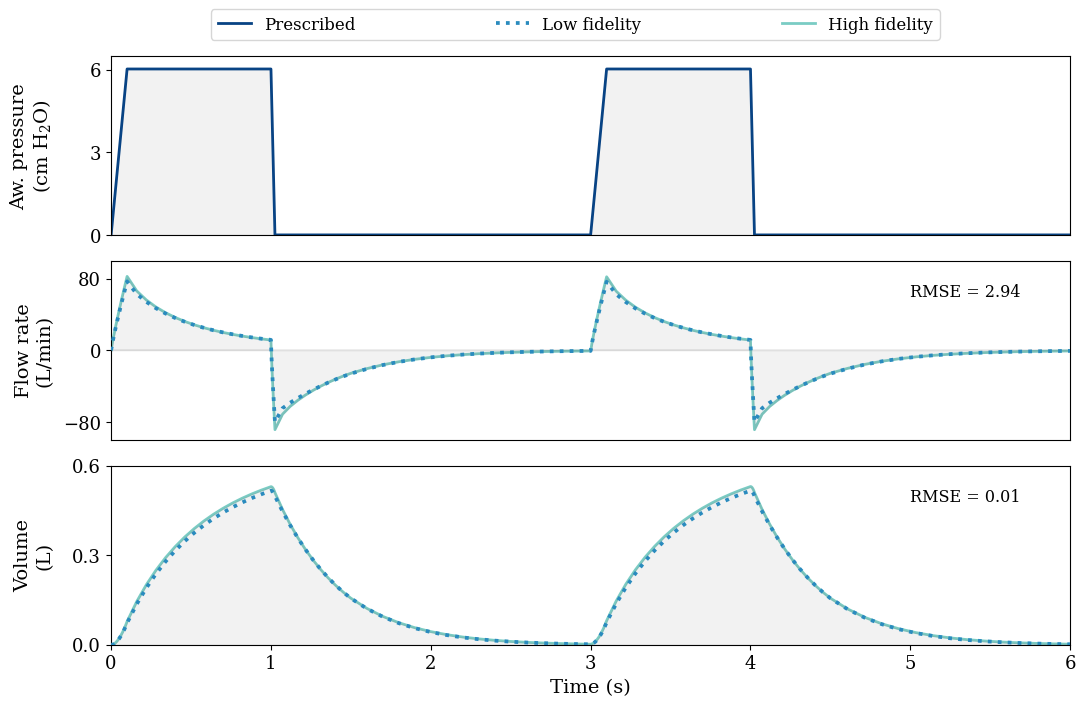

<Figure size 640x480 with 0 Axes>

In [11]:
#Mechanical ventilation curves for high fidelity and low fidelity
position='upper right'
limx=6
limxmin=-0.001
si=14
fig, ((ax1,ax2,ax3)) = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(11, 6.7)
fig.tight_layout()

# pressure
minor_ticks_left=np.linspace(0,6,3)
ax1.plot(np.asarray(hf_bir2019tiempos),np.asarray(hf_bir2019presiones)*10.2, color=rgba_4,linewidth=2, alpha = 1, label = 'Prescribed')
ax1.fill_between(hf_bir2019tiempos,np.asarray(hf_bir2019presiones)*10.2, color='grey', alpha = 0.1)
ax1.set_ylabel(r'Aw. pressure' "\n" '(cm $\mathregular{H_2O}$)',size=si)
ax1.set_xlim(limxmin,limx)
ax1.set_ylim(0,6.5)
ax1.set_yticks(minor_ticks_left)
ax1.get_yaxis().set_label_coords(-0.06,0.5)
ax1.tick_params(axis='x', which='both', bottom=False, top = False, labelbottom =False)
ax1.tick_params(axis='y', labelsize=13)

# airflow
minor_ticks_left=np.linspace(-80,80,3)
ax2.plot(lf_bir2019tiempos,1*np.asarray(lf_bir2019flujos),color=rgba_5,label='Low fidelity',linewidth=2.7, linestyle = 'dotted',zorder = 10)
ax2.plot(hf_bir2019tiempos,1*np.asarray(hf_bir2019flujos),color=rgba_6,label='High fidelity',linewidth=2, linestyle = 'solid', alpha=1,zorder = 0)
ax2.annotate("RMSE = {:.2f}".format(np.sqrt(MSE(hf_bir2019flujos[1:],lf_bir2019flujos[1:]))), (5, 60), size = 11.5)
ax2.fill_between(hf_bir2019tiempos,hf_bir2019flujos-hf_bir2019flujos[0], color='grey', alpha = 0.1)
ax2.set_ylabel(r'Flow rate' "\n" '(L/min)',size=si)
ax2.axhline(0,color='black',linestyle="-",lw=0.1)
ax2.set_xlim(limxmin,limx)
ax2.set_ylim(-100,100)
ax2.set_yticks(minor_ticks_left)
ax2.get_yaxis().set_label_coords(-0.06,0.5)
ax2.tick_params(axis='x', which='both', bottom=False, top = False, labelbottom =False)
ax2.tick_params(axis='y', labelsize=13)

# volume
minor_ticks_left=np.linspace(0,0.6,3)
ax3.plot(lf_bir2019tiempos,(lf_bir2019volumenes-lf_bir2019volumenes[0]),color=rgba_5,linewidth=2.7, linestyle = 'dotted',zorder = 10)
ax3.plot(hf_bir2019tiempos,(hf_bir2019volumenes-hf_bir2019volumenes[0]),color=rgba_6,linewidth=2, linestyle = 'solid', alpha = 1,zorder = 0)
ax3.annotate("RMSE = {:.2f}".format(np.sqrt(MSE(hf_bir2019volumenes[2:],lf_bir2019volumenes[2:]))), (5, 0.48), size = 11.5)
ax3.fill_between(hf_bir2019tiempos,hf_bir2019volumenes-hf_bir2019volumenes[0], color='grey', alpha = 0.1)
ax3.set_ylabel(r'Volume' "\n" '(L)',size=si)
ax3.set_xlabel(r'Time (s)',size=si)
ax3.set_xlim(limxmin,limx)
ax3.set_ylim(0,0.6)
ax3.set_yticks(minor_ticks_left)
ax3.get_yaxis().set_label_coords(-0.06,0.5)
ax3.tick_params(axis='x', labelsize=13)
ax3.tick_params(axis='y', labelsize=13)

fig.legend(bbox_to_anchor=(0.2, 1.002, 0.6625, 0.2), loc="lower left", ncol=3, fancybox = True, mode ='expand', borderaxespad=0, fontsize=12)

plt.tight_layout() 

fig.savefig("mv_curves_hflf.jpg", bbox_inches='tight', dpi=300)

plt.show()
plt.draw()